In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question 1 - What are the top three body parts most frequently represented in this dataset?

The main dataset we'll be using is `NEISS2014.csv`. Using `pandas` we can create a DataFrame and see what columns we have to work with.

In [5]:
main_df = pd.read_csv('NEISS2014.csv')

In [6]:
main_df.dtypes

CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex             object
race            object
race_other      object
diag             int64
diag_other      object
body_part        int64
disposition      int64
location         int64
fmv              int64
prod1            int64
prod2          float64
narrative       object
dtype: object

Looks like we're using the `body_part` column. Since we want the counts on how many times the top 3 body parts are referenced, we'll do the following:

In [27]:
top_body_count = main_df['body_part'].value_counts().head(n=3).to_frame()

top_body_count

,body_part
75,9891
76,5786
92,5783


75, 76, and 92 seem to be the most reoccuring body part IDs. Let's create a new DataFrame from `BodyParts.csv` to see what the corresponding body parts are for these IDs.

In [11]:
body_df = pd.read_csv('BodyParts.csv')

In [14]:
body_df

,BodyPart,Code
0,"Arm, lower",33
1,"Arm, upper",80
2,Ankle,37
3,Ear,94
4,Elbow,32
5,Eyeball,77
6,Face,76
7,Finger,92
8,Foot,83
9,Hand,82


Yes, it's easy to look at the table and determine which body part corresponds to what code, but that's not why we're here.

In [35]:
for i in top_body_count.index.values:
    print(body_df.loc[body_df['Code'] == i])

   BodyPart  Code
10     Head    75
  BodyPart  Code
6     Face    76
  BodyPart  Code
7   Finger    92


Answer: The top three body parts most frequently represented is the Head (9891), the Face (5786), and the Finger (5783).

# Question 1 - What are the top three body parts that are least frequently represented?

Here we're going to do the same thing, except we're focusing on the last 3.

In [39]:
least_body_count = main_df['body_part'].value_counts().tail(n=3).to_frame()

least_body_count

,body_part
87,390
38,286
84,4


In [40]:
for i in least_body_count.index.values:
    print(body_df.loc[body_df['Code'] == i])

        BodyPart  Code
25  Not Recorded    87
        BodyPart  Code
17  Pubic region    38
          BodyPart  Code
23  25-50% of body    84


"Not Recorded" and "25-50% of body" doesn't really tell us much. Let's expand to `n=6`.

In [42]:
least_body_count = main_df['body_part'].value_counts().tail(n=6).to_frame()

least_body_count

,body_part
81,756
80,745
0,549
87,390
38,286
84,4


In [43]:
for i in least_body_count.index.values:
    print(body_df.loc[body_df['Code'] == i])

      BodyPart  Code
14  Leg, upper    81
     BodyPart  Code
1  Arm, upper    80
    BodyPart  Code
11  Internal     0
        BodyPart  Code
25  Not Recorded    87
        BodyPart  Code
17  Pubic region    38
          BodyPart  Code
23  25-50% of body    84


Answer: The top three body parts least frequently represented is the Pubic Region (286), Internal (549), and the Upper Arm (745). 

# Question 2 - How many injuries in this dataset involve a skateboard?

Using the `narrative` column, we can see which rows contain the word "skateboard".

In [45]:
sb_df = main_df[main_df['narrative'].str.contains('SKATEBOARD')]

In [52]:
sb_df['narrative'].count()

466

Answer: We can determine there are 466 injuries that involve a skateboard.

# Question 2 - Of those injuries, what percentage were male and what percentage were female?

Using the `sex` column, we can find this information.

In [54]:
sb_df[sb_df['sex'] == "Male"]['sex'].count()

384

In [57]:
384/466*100

82.40343347639485

In [55]:
sb_df[sb_df['sex'] == "Female"]['sex'].count()

82

In [58]:
82/466*100

17.59656652360515

Answer: About 82.4% were male and 17.6% were female.

# Question 2 - What was the average age of someone injured in an incident involving a skateboard?

Here we just need to use the `.mean()` function on the `age` column.

In [70]:
sb_df['age'].mean()

17.991416309012877

Answer: The average age for skateboarding incidents is around 18.

# Question 3 - What diagnosis had the highest hospitalization rate?

Using the `diag` column and importing `DiagnosisCodes.csv`, we can determine the highest diagnosis hospitilization rate.

In [61]:
main_df['diag'].value_counts().head(n=1)

59    12307
Name: diag, dtype: int64

In [62]:
diag_df = pd.read_csv('DiagnosisCodes.csv')

diag_df.dtypes

Diagnosis    object
Code          int64
dtype: object

In [63]:
diag_df[diag_df['Code'] == 59]

,Diagnosis,Code
23,Laceration,59


Answer: Laceration had the highest hospitalization rate, with 12307 entries.

# Question 3 - What diagnosis most often concluded with the individual leaving without being seen?

To answer this, we'll need to look at which Disposition code is used for patients not being seen.

In [64]:
dispo_df = pd.read_csv('Disposition.csv')

dispo_df

,Disposition,Code
0,"Treated and released, or examined and released...",1
1,Treated and transferred to another hospital,2
2,Treated and admitted for hospitalization (with...,4
3,Held for observation (includes admitted for ob...,5
4,Left without being seen/Left against medical a...,6
5,"Fatality, including DOA, died in the ED",8
6,Not Recorded,9


Code 6! Okay, first we want to create a DataFrame only consisting of disposition code 6, and then we want to find the most reoccuring diagnosis in said new DataFrame.

In [65]:
code6_df = main_df[main_df['disposition'] == 6]

In [66]:
code6_df['diag'].value_counts().head(n=1)

71    257
Name: diag, dtype: int64

In [67]:
diag_df[diag_df['Code'] == 71]

,Diagnosis,Code
29,Other/Not Stated,71


Well that doesn't help... time for `n=2`!

In [68]:
code6_df['diag'].value_counts().head(n=2)

71    257
59    123
Name: diag, dtype: int64

In [69]:
diag_df[diag_df['Code'] == 59]

,Diagnosis,Code
23,Laceration,59


Answer: Well that was unexpected. Laceration is not only the highest hospitalization rate diagnosis, but it is also the highest known reason for the individual leaving without being seen.

# Question 3 - Briefly discuss your findings and any caveats you'd mention when discussing this data.

Answer: Again, it was unexpected seeing laceration both as the highest hospitalization diagnosis and the diagnosis most often concluded with the patient leaving before being seen. An explanation of this could be the way the hospital is defining the term "Laceration", meaning they may not be taking severity into consideration. For example, in this case a laceration could include a small cut on the finger, or a sharp knife wound in the stomach. Therefore, defining the severity of lacerations is important for more accurate data.

# Question 4 - Visualize any existing relationship between age and reported injuries.

Here I'll be looking at the mean and standard deviation of the ages relative to the diagnosis codes.

In [91]:
diag_df

,Diagnosis,Code
0,Amputation,50
1,Anoxia,65
2,Aspirated foreign object,42
3,Avulsion,72
4,"Burns, scald (from hot liquids or steam)",48
5,"Burns, thermal (from flames or hot surface)",51
6,"Burns, chemical (caustics, etc.)",49
7,"Burns, radiation (includes all cell damage by ...",73
8,"Burns, electrical",46
9,"Burns, not specified",47


In [74]:
diag_codes = diag_df['Code'].tolist()

diag_codes

[50,
 65,
 42,
 72,
 48,
 51,
 49,
 73,
 46,
 47,
 52,
 53,
 54,
 60,
 74,
 55,
 67,
 56,
 57,
 58,
 66,
 41,
 62,
 59,
 61,
 68,
 63,
 64,
 69,
 71]

In [84]:
diag_std_df = pd.DataFrame(columns=('code', 'mean', 'std'))
for i,code in enumerate(diag_codes):
    temp_df = main_df[main_df['diag'] == code]
    diag_std_df.loc[i] = (code, temp_df['age'].mean(), temp_df['age'].std())

In [161]:
diag_std_df.sort_values(['std'], ascending=True)

,mean,std
code,,
61.0,44.621212,15.704212
64.0,31.616308,23.179576
47.0,32.736842,24.986312
63.0,33.312893,29.905224
73.0,35.314286,35.085418
56.0,25.499213,37.227195
71.0,42.824015,37.259101
67.0,38.187500,38.117338
57.0,40.775655,38.191094


It looks like there is a relationship between age and code 61 (nerve damage), due to the standard deviation being about 8 units lower than the second lowest standard deviation. Let's visualize it.

In [127]:
nerve_damage_df = temp_df = main_df[main_df['diag'] == 61]

In [163]:
def count_age_range(age_range, df):
    start = age_range[0]
    end = age_range[1]
    
    mask = (nerve_damage_df['age'] >= start) & (nerve_damage_df['age'] <= end)
    temp = nerve_damage_df.loc[mask]
    return temp['age'].value_counts().sum()

In [164]:
age_ranges = [(0,9), (10,19), (20,29), (30,39),
              (40,49), (50,59), (60,69), (70,79),
              (80,89), (90,99)]
age_counts = []

for i in age_ranges:
    age_counts.append(count_age_range(i, nerve_damage_df))

age_counts

[0, 7, 26, 48, 47, 40, 12, 11, 7, 0]

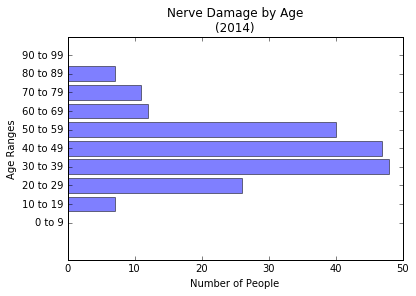

In [165]:
ages = ['0 to 9', '10 to 19', '20 to 29',
       '30 to 39', '40 to 49', '50 to 59',
       '60 to 69', '70 to 79', '80 to 89',
       '90 to 99']
y_pos = np.arange(len(ages))

plt.barh(y_pos,
       age_counts,
       align='center',
       alpha=0.5)
plt.yticks(y_pos, ages)
plt.xlabel('Number of People')
plt.ylabel('Age Ranges')
plt.title('Nerve Damage by Age\n(2014)')
plt.show()

As we can see, a spike of nerve damage patients occurs between the ages of 30 and 59.

# Question 5+ - Investigate the data however you like and discuss any interesting insights you can find in the data.

For the patients experiencing nerve damage between ages 30 and 59 - are males more likely to experience this more than females?

In [171]:
mask = (nerve_damage_df['age'] >= 30) & (nerve_damage_df['age'] <= 59)
nerve_df = nerve_damage_df.loc[mask]
nerve_df['CPSC Case #'].count()

135

In [177]:
nerve_df[nerve_df['sex'] == "Male"]['sex'].count()

62

In [174]:
62/135*100

45.925925925925924

In [173]:
nerve_df[nerve_df['sex'] == "Female"]['sex'].count()

73

In [175]:
73/135*100

54.074074074074076

Women look like they are slightly more likely to experience nerve damage between the ages of 30 to 59 than men (54% compared to 46%, respectfully).

Where are these patients most likely to experience nerve damage?

In [192]:
nerve_df['body_part'].value_counts()

79    95
89    13
34     8
31     6
33     4
83     1
82     1
81     1
80     1
37     1
36     1
35     1
32     1
30     1
Name: body_part, dtype: int64

In [194]:
body_df.loc[body_df['Code'] == 79]

,BodyPart,Code
20,"Trunk, lower",79


In [196]:
95/135*100

70.37037037037037

About 70% of nerve damage patients between the ages of 30 and 59 are likely to be effected in their lower abdomen. Yikes.